# Process data from VISTA Enhancers
Import the required libraries.

In [1]:
import numpy as np
import pandas as pd
from Bio import SeqIO
import re
from tqdm import tqdm
from utils.utils import bed_extract, gtf_annotation_extract

As the files downloaded from VISTA are in `.fasta` format rather than `.bed`
we will need to extract the `.bed` regions from the `.fasta` records.

In [3]:
### HUMAN ###
# This cell will extract the bed coordinates from the VISTA hg19 fasta file
# and write it into a bed file.
in_fa = '/Users/callummacphillamy/PhD/Reference_Genomes/hg19/hg19.VISTA.enhancers.fa'
beds = []
print('Extracting bed regions')
for record in tqdm(SeqIO.parse(in_fa, 'fasta')):
    rec = re.split('[|:-]', record.name)
    beds.append((rec[1:]))
print('Finished extracting bed regions')

with open('/Users/callummacphillamy/PhD/Reference_Genomes/hg19/hg19.VISTA.enhancers.bed', 'w') as bed:

    for i in tqdm(beds):
        bed.write(f'{i[0]}\t{i[1]}\t{i[2]}\tenhancer\n')

Extracting bed regions


998it [00:00, 49721.64it/s]


Finished extracting bed regions


100%|██████████| 998/998 [00:00<00:00, 816763.98it/s]


In [5]:
hg19 = pd.read_csv('../../Reference_Genomes/hg19/hg19.Ensembl.annotations.sorted.bed',
                   sep='\t',
                   header=None,
                   index_col=None)
enhancers = pd.read_csv('../../Reference_Genomes/hg19/hg19.VISTA.enhancers.sorted.bed',
                        sep='\t',
                        header=None,
                        index_col = None)

In [13]:
intron_en = 0
intron_enhancers = open('../../Reference_Genomes/hg19/hg19.VISTA.intron.enhancers.bed', 'w')
for row in tqdm(hg19.itertuples()):
    #print(row)
    if row[4] == 'gene':
        for en in enhancers.itertuples():
            chrom = row[1]
            gene_start = row[2]
            gene_stop = row[3]
            en_chrom = en[1]
            en_start = en[2]
            en_stop = en[3]
            if chrom == en_chrom:
                if en_start > gene_start and en_stop < gene_stop:
                    #intron_enhancers.write(f'{en_chrom}\t{en_start}\t{en_stop}\n')
                    intron_en += 1

print(intron_en)
intron_enhancers.close()

2612761it [01:33, 28070.62it/s]

569


In [3]:
### MOUSE ###

in_fa = '../data/VISTA/mm9/originals/mm9.VISTA.enhancers.fa'
beds = []
print('Extracting bed regions')
for record in tqdm(SeqIO.parse(in_fa, 'fasta')):
    rec = re.split('[|:-]', record.name)
    beds.append((rec[1:]))
print('Finished extracting bed regions')

with open('../data/VISTA/mm9/originals/mm9.VISTA.enhancers.bed', 'w') as bed:

    for i in tqdm(beds):
        if not re.match('chr[XYxy]', i[0]):
            bed.write(f'{i[0]}\t{i[1]}\t{i[2]}\n')

656it [00:00, 32528.21it/s]
100%|██████████| 656/656 [00:00<00:00, 349703.03it/s]

Extracting bed regions
Finished extracting bed regions


We then want to sort the enhancers such that chr1, chr2, ... chrN.
`cat hg19.VISTA.enhancers.bed | sort -V > sorted.hg19.VISTA.enhancers.bed`

Next, we filter the enhancer bed file to remove the autosomes.

In [17]:
### HUMAN ###
hg19 = SeqIO.to_dict(SeqIO.parse
                     ('/Users/callummacphillamy/PhD/Reference_Genomes/hg19/hg19'
                      '.fa', 'fasta'))

auto_hg19 = {}
autos = [f'chr{i}' for i in range(1,23)]
for k, v in hg19.items():
    if k in autos:
        auto_hg19[f'{k}'] = v
gen = open('/Users/callummacphillamy/PhD/Reference_Genomes/hg19/hg19.autos'
           '.fa', mode='w')
for k, v in auto_hg19.items():
    gen.write(f'>{k}\n{v.seq}\n')
gen.close()

chr1 ID: chr1
Name: chr1
Description: chr1
Number of features: 0
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN')


In [4]:
### MOUSE ###
mm9 = SeqIO.to_dict(SeqIO.parse
                     ('/Users/callummacphillamy/PhD/Reference_Genomes/mm9/mm9'
                      '.fa',
                      'fasta'))

auto_mm9 = {}
autos = [f'chr{i}' for i in range(1,21)]
for k, v in mm9.items():
    if k in autos:
        auto_mm9[f'{k}'] = v
gen = open('/Users/callummacphillamy/PhD/Reference_Genomes/mm9/mm9.autos.fa',
           mode='w')
for k, v in auto_mm9.items():
    gen.write(f'>{k}\n{v.seq}\n')
gen.close()


In [4]:
### HUMAN ###

from utils.utils import fa_stats
from Bio.SeqUtils import GC
stats = fa_stats('../data/VISTA/hg19/originals/hg19.VISTA.enhancers.noXY.fa')
autos_hg19 = SeqIO.to_dict(SeqIO.parse
                     ('/Users/callummacphillamy/PhD/Reference_Genomes/hg19'
                      '/hg19.autos'
                      '.fa', 'fasta'))

gc_content = []
print('Chromosome\tGC content (%)')
for k, v in autos_hg19.items():
    gc_content.append(GC(v.seq))
    print(f'{k}\t{GC(v.seq)}')
gc_content = np.array(gc_content)
print(f'\nAverage GC content of hg19 autosomes: \t {np.sum(gc_content)/gc_content.shape[0]}\n')

enh_stats_df = pd.DataFrame.from_dict(stats)

print(enh_stats_df.describe())

985it [00:05, 195.98it/s]


Chromosome	GC content (%)
chr1	37.7294843329598
chr2	39.41725088246835
chr3	39.04775181276182
chr4	37.54905697218094
chr5	38.81296083039098
chr6	38.749778825730175
chr7	39.78206666220389
chr8	39.22180001312071
chr9	35.15208903889602
chr10	40.290089595991205
chr11	40.37200397053428
chr12	39.7843041370464
chr13	31.976654520724594
chr14	33.62760473868821
chr15	33.624793663193415
chr16	39.103673937330115
chr17	43.63348034939499
chr18	38.04226808813753
chr20	41.66128260425301
chr19	45.64495891972301
chr22	32.63884738835916
chr21	29.783844323782546

Average GC content of hg19 autosomes: 	 37.983911163994144

           Lengths  GC content  Percentage of Ns  Molecular weight
count   985.000000  985.000000             985.0      9.850000e+02
mean   2084.502538   42.778536               0.0      6.439361e+05
std    1169.124057    7.487879               0.0      3.611484e+05
min     428.000000   26.410027               0.0      1.320661e+05
25%    1259.000000   36.982846               0.0      3

In [7]:
### MOUSE ###
from utils.utils import fa_stats
from Bio.SeqUtils import GC

stats = fa_stats('../data/VISTA/mm9/originals/mm9.VISTA.enhancers.noXY.fa')
autos_mm9 = SeqIO.to_dict(SeqIO.parse
                          ('/Users/callummacphillamy/PhD/Reference_Genomes'
                           '/mm9/mm9.autos.fa','fasta'))
gc_content=[]
print('Chromosome\tGC content (%)')
for k, v in autos_mm9.items():
    gc_content.append(GC(v.seq))
    print(f'{k}\t{GC(v.seq)}')
gc_content = np.array(gc_content)
print(f'Average GC content of mm9 autosomes:\t{np.sum(gc_content)/gc_content.shape[0]}')
mm9_stats_df = pd.DataFrame.from_dict(stats)
print(mm9_stats_df.describe())

653it [00:04, 154.22it/s]


Chromosome	GC content (%)
chr1	39.94467376911652
chr2	41.305718392513256
chr3	39.637652264226446
chr4	41.2821020763847
chr5	41.1918507071115
chr6	40.52969762904009
chr7	40.03539810406787
chr8	40.13509801522437
chr9	41.55822118690122
chr10	40.39910839989352
chr11	42.69902374068004
chr12	40.44685884662173
chr13	40.2600864525043
chr14	39.987965480756465
chr15	40.72388191527059
chr16	39.55810541486577
chr17	41.18025434182576
chr18	39.988956510183186
chr19	40.50337262478842
Average GC content of mm9 autosomes:	40.59831715115662
           Lengths  GC content  Percentage of Ns  Molecular weight
count   653.000000  653.000000             653.0      6.530000e+02
mean   2533.272588   47.199045               0.0      7.824816e+05
std    1165.620742    5.210994               0.0      3.600263e+05
min     330.000000   32.624662               0.0      1.027655e+05
25%    1597.000000   43.736264               0.0      4.932034e+05
50%    2503.000000   47.200805               0.0      7.734455e+05
75

/Users/callummacphillamy/anaconda3/envs/pred-comp/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GC content', ylabel='Density'>

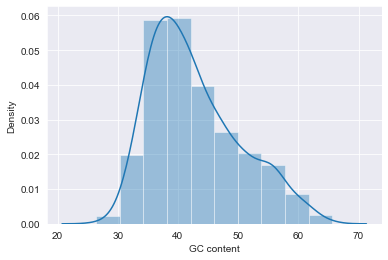

In [13]:
import seaborn as sns

gc = enh_stats_df.iloc[:, 1]
sns.set_style('darkgrid')
sns.distplot(gc, bins=10)

In [3]:
### HUMAN ###
# Read in bed file and generate positive windows.
bed = pd.read_csv('../data/VISTA/hg19/originals/hg19.VISTA.enhancers.noXY.bed',
                  header=None,
                  index_col=None,
                  sep='\t')

985it [00:00, 1357.25it/s]
985it [00:00, 2176.02it/s]
653it [00:00, 1068.49it/s]
653it [00:00, 1940.94it/s]


In [5]:
windows = [1000,2000] #, 4000, 8000]
species = ['hg19', 'mm9']
#windows = [500]
for s in species:
    for w in windows:
        bed_extract(in_bed=f'../data/VISTA/{s}/originals/{s}.VISTA.enhancers'
                           '.noXY.bed',
            outfile=f'../data/VISTA/{s}/pos_bed/{s}.VISTA.enhancers.noXY'
                    f'.{w}bp.bed',
            window=w,
            step=1,
            label='enhancer')

985it [00:00, 1297.00it/s]
985it [00:00, 2924.37it/s]
653it [00:00, 980.92it/s] 
653it [00:00, 1614.50it/s]


In [6]:
### MOUSE ###
bed = pd.read_csv('../data/VISTA/mm9/originals/mm9.VISTA.enhancers.noXY.bed',
                  header=None,
                  index_col=None,
                  sep='\t')

windows = [200, 400, 1000, 1500, 2000, 4000, 8000]
#windows = [500]
for w in windows:
    bed_extract(in_bed='../data/VISTA/mm9/originals/mm9.VISTA.enhancers.noXY'
                       '.bed',
            outfile=f'../data/VISTA/mm9/pos_bed/mm9.VISTA.enhancers.noXY'
                    f'.{w}bp.bed',
            window=w,
            step=1,
            label='enhancer')

653it [00:00, 722.30it/s]
653it [00:00, 773.96it/s] 
653it [00:00, 1013.36it/s]
653it [00:00, 1412.81it/s]
653it [00:00, 1977.72it/s]
653it [00:00, 11580.89it/s]
653it [00:00, 392952.73it/s]


The above cell will generate a series of files based on the sorted VISTA
enhancers file.

If the original enhancer region is shorter than the desired
window size then it will take the window size (e.g. 200bp) centered around the
midpoint of the original enhancer region.

Next, we want to find the promoter regions for the protein coding genes. This
 may need some tweaking, but currently I take a 2kb region centered around
 the start of the protein coding gene.

In [3]:
# Find promoter regions for protein-coding genes.
# CrepHAN say that they define the promoter region as a 2kb region centered
# around the TSS of protein-coding genes.
print(f'Reading in genome annotation file.')
genes = pd.read_csv('../data/VISTA/hg19/originals/Homo_sapiens.GRCh37.87.chr'
                    '.gtf',
                    header=None,
                    index_col=None,
                    sep='\t',
                    comment='#')
count = 0
protein_coding_idx = []
print('Finding protein-coding regions.')
for i in tqdm(genes.itertuples()):
    if re.match('gene', i[3]):
        #print(i)
        gene = re.split(';',i[9])
        if 'protein_coding' in gene[-2]:
            protein_coding_idx.append(i[0])
            count += 1
        #break
print(f'Number of protein coding genes in the genome: {count}')

protein_df = genes.iloc[protein_coding_idx, :]

protein_df.reset_index(drop=True,
                       inplace=True)
print('Writing promoter regions to bed file.')
with open('../data/VISTA/hg19/originals/hg19.VISTA.promoter_regions.bed', 'w') \
        as bed:
    for i in protein_df.itertuples():
        if re.match('[+]', i[7]):
            bed.write(f'chr{i[1]}\t{i[4]-1000}\t{i[4]+1000}\tpromoter_region\n')
        elif re.match('[-]', i[7]):
            assert i[7] == '-', 'Somthing went wrong'
            bed.write(f'chr{i[1]}\t{i[5]-1000}\t{i[5]+1000}\tpromoter_region\n')

Reading in genome annotation file.


/Users/callummacphillamy/anaconda3/envs/pred-comp/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
31164it [00:00, 311618.01it/s]

Finding protein-coding regions.


2612761it [00:05, 459838.35it/s]

Number of protein coding genes in the genome: 20327


In [10]:
print(f'Reading in genome annotation file.')
genes = pd.read_csv('../data/VISTA/mm9/originals/gencode.vM1.annotation.gtf',
                    header=None,
                    index_col=None,
                    sep='\t',
                    comment='#')
count = 0
protein_coding_idx = []
print('Finding protein-coding regions.')
for i in tqdm(genes.itertuples()):
    if re.match('gene', i[3]):
        #print(i)
        gene = re.split(';',i[9])
        gene_type = gene[2]
        gene_status = gene[3]
        assert 'gene_type' in gene_type, 'Something went wrong. There is no ' \
                                         '"gene_type" in `gene_type`.'
        assert 'gene_status' in gene_status, 'No "gene_status" in ' \
                                             '`gene_status`.'
        if 'protein_coding' in gene_type and 'KNOWN' in gene_status:
            protein_coding_idx.append(i[0])
            count += 1

print(f'Number of protein coding genes in the genome: {count}')

protein_df = genes.iloc[protein_coding_idx, :]

protein_df.reset_index(drop=True,
                       inplace=True)
print('Writing promoter regions to bed file.')
with open('../data/VISTA/mm9/originals/mm9.VISTA.promoter_regions.bed', 'w') \
        as bed:
    for i in protein_df.itertuples():
        if re.match('[+]', i[7]):
            assert i[7] == '+', 'Something went wrong.'
            bed.write(f'{i[1]}\t{i[4]-1000}\t{i[4]+1000}\tpromoter_region\n')
        elif re.match('[-]', i[7]):
            assert i[7] == '-', 'Somthing went wrong'
            bed.write(f'{i[1]}\t{i[5]-1000}\t{i[5]+1000}\tpromoter_region\n')

Reading in genome annotation file.


43149it [00:00, 431471.89it/s]

Finding protein-coding regions.


1541720it [00:02, 560324.70it/s]

Number of protein coding genes in the genome: 21567
Writing promoter regions to bed file.


As we can see the number of protein-coding genes is ~20,000 which sounds
pretty good for the human genome.

Next, we need to reformat the `.gtf` file to make it compatible with our
other annotation files and `bedtools complement`.

In [45]:
### HUMAN ###
gtf_annotation_extract('../data/VISTA/hg19/originals/Homo_sapiens.GRCh37.87.chr'
                       '.gtf',
                       '../data/VISTA/hg19/originals/hg19.Ensembl.annotations'
                       '.bed')

Reading in annotation file ../data/VISTA/hg19/originals/Homo_sapiens.GRCh37.87.chr.gtf


/Users/callummacphillamy/anaconda3/envs/pred-comp/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
43155it [00:00, 431532.92it/s]

Writing reformatted annotations to ../data/VISTA/hg19/originals/hg19.Ensembl.annotations.bed


2612761it [00:04, 568648.81it/s]


'Finished. Saved to ../data/VISTA/hg19/originals/hg19.Ensembl.annotations.bed'

In [3]:
### MOUSE ###
gtf_annotation_extract('../data/VISTA/mm9/originals/gencode.vM1.annotation'
                       '.gtf',
                       '../data/VISTA/mm9/originals/mm9.GENCODE.annotations'
                       '.bed',
                       append_chr=False)

Reading in annotation file ../data/VISTA/mm9/originals/gencode.vM1.annotation.gtf


111980it [00:00, 562379.10it/s]

Writing reformatted annotations to ../data/VISTA/mm9/originals/mm9.GENCODE.annotations.bed


1541720it [00:02, 571947.54it/s]


'Finished. Saved to ../data/VISTA/mm9/originals/mm9.GENCODE.annotations.bed'

In [9]:
bl = pd.read_csv('../data/VISTA/mm9/originals/mm9-blacklist.bed',
                 header=None,
                 sep='\t',
                 index_col=None)
new_bl = open('../data/VISTA/mm9/originals/mm9.ENCODE.blacklist.v1.bed', 'w')
for i in bl.itertuples():
    #print(bl[1], bl[2])
    new_bl.write(f'{i[1]}\t{i[2]}\t{i[3]}\tENCODE_blacklist_v1\n')
new_bl.close()

We then want to create bed files that represent all annotated regions of the
genome. This requires us to combine the genome annotations, enhancers of the
desired window size, the blacklisted regions and the promoter regions.

```shell
x=(200 400 1000 1500 2000 4000 8000)
for i in ${x[@]}
do
  cat hg19.ENCODE.blacklist.bed hg19.VISTA.promoter_regions.bed hg19
  .annotations.bed sorted.hg19.VISTA.enhancers.${i}bp.bed | sort -V > hg19
  .VISTA.annotated.regions.${i}bp.bed
done
```

Create the non-genic regions for each window size.
```shell
x=(200 400 1000 1500 2000 4000 8000)
for i in ${x[@]}
do
  bedtools complement -i hg19.VISTA.annotated.regions.${i}bp.bed -g sorted
  .hg19.chrom.sizes > hg19.non-genic.regions.${i}bp.bed
done
```

In [5]:
### HUMAN ###
from utils.utils import neg_bed_extract
for s in species:
    for w in windows:
        neg_bed_extract(f'../data/VISTA/{s}/neg_bed/{s}.VISTA.non-genic'
                        f'.regions'
                    f'.{w}bp.bed',
                    f'../data/VISTA/{s}/neg_bed/{s}.VISTA.non_enhancers.{w}bp'
                    f'.bed',
                    window=w,
                    step=(w//2),
                    label='non_enhancer')

32534it [00:01, 18589.37it/s]
32526it [00:00, 38463.63it/s]
28342it [00:01, 15321.47it/s]
28340it [00:00, 30091.83it/s]


In [13]:
### MOUSE ###
windows = [200, 400, 1000, 1500, 2000, 4000, 8000]
from utils.utils import neg_bed_extract
for w in windows:
    neg_bed_extract(f'../data/VISTA/mm9/neg_bed/mm9.VISTA.non-genic'
                    f'.regions.{w}bp.bed',
                    f'../data/VISTA/mm9/neg_bed/mm9.VISTA.non_enhancers.{w}bp'
                    f'.bed',
                    window=w,
                    step=(w//2),
                    label='non_enhancer')

28343it [00:09, 2940.72it/s]
28343it [00:04, 5756.09it/s]
28342it [00:02, 14134.91it/s]
28342it [00:01, 22998.56it/s]
28340it [00:00, 30169.10it/s]
28327it [00:00, 59425.37it/s]
28299it [00:00, 112904.74it/s]


In [ ]:
## SKIP THIS STEP ##
# Split data so that there is no overlap between examples in the training,
# validation and testing sets.
from sklearn.utils import shuffle
hg19 = [f'chr{i}' for i in range(1,23)]

# Shuffle the chromosomes
shuf_hg19 = shuffle(hg19, random_state=12)

# Create training, validation and testing splits. 70-20-10 split
train_chrs = shuf_hg19[:int(len(shuf_hg19)*0.7)]
val_chrs = shuf_hg19[int(len(shuf_hg19)*0.7):int(len(shuf_hg19)*0.9)]
test_chrs = shuf_hg19[int(len(shuf_hg19)*0.9):]

In [6]:
### HUMAN ###
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
# Read in bed file for all positive examples
windows = [1000, 2000] #1500, 2000, 4000, 8000]
for w in windows:
    for s in species:
        print(f'Reading in {w}bp positive regions')
        pos_df = pd.read_csv(f'../data/VISTA/{s}/pos_bed/{s}.VISTA.enhancers'
                         f'.noXY.{w}bp.bed',
                     header=None,
                     index_col=None,
                     sep='\t')

        # Remove any duplicated regions
        print('Deduplicating dataframe')
        pos_dedup = pos_df.drop_duplicates()

        print(f'Generating index of {pos_dedup.shape[0]} examples\n')
        pos_df_idx = np.arange(pos_dedup.shape[0])
        print(f'Shuffling and splitting...')
        shuf_idx = shuffle(pos_df_idx, random_state=12)

        train_idx = shuf_idx[:int(len(shuf_idx)*0.7)]
        val_idx = shuf_idx[int(len(shuf_idx)*0.7):int(len(shuf_idx)*0.9)]
        test_idx = shuf_idx[int(len(shuf_idx)*0.9):]

        train_df = pos_dedup.iloc[train_idx, :]
        val_df = pos_dedup.iloc[val_idx, :]
        test_df = pos_dedup.iloc[test_idx, :]

        print('Writing to files')
        train_bed = open(f'../data/VISTA/{s}/pos_bed/{s}.VISTA.enhancers.noXY'
                     f'.{w}bp'
                 f'.train.bed', 'w')
        val_bed = open(f'../data/VISTA/{s}/pos_bed/{s}.VISTA.enhancers.noXY'
                       f'.{w}bp'
                 f'.val.bed', 'w')
        test_bed = open(f'../data/VISTA/{s}/pos_bed/{s}.VISTA.enhancers.noXY'
                        f'.{w}bp'
                 f'.test.bed', 'w')
        print(f'Writing training, validation and testing sets to files for '
          f'positive {w}bp to files.')
        for i in tqdm(train_df.itertuples()):
            train_bed.write(f'{i[1]}\t{i[2]}\t{i[3]}\n')
        for i in tqdm(val_df.itertuples()):
            val_bed.write(f'{i[1]}\t{i[2]}\t{i[3]}\n')
        for i in tqdm(test_df.itertuples()):
            test_bed.write(f'{i[1]}\t{i[2]}\t{i[3]}\n')
        train_bed.close()
        val_bed.close()
        test_bed.close()

Reading in 1000bp positive regions
Deduplicating dataframe


0it [00:00, ?it/s]

Generating index of 1090891 examples

Shuffling and splitting...
Writing to files
Writing training, validation and testing sets to files for positive 1000bp to files.


763623it [00:01, 696549.36it/s]
218178it [00:00, 781478.32it/s]
109090it [00:00, 709990.03it/s]


Reading in 1000bp positive regions
Deduplicating dataframe


0it [00:00, ?it/s]

Generating index of 1009532 examples

Shuffling and splitting...
Writing to files
Writing training, validation and testing sets to files for positive 1000bp to files.


706672it [00:00, 738534.81it/s]
201906it [00:00, 638585.57it/s]
100954it [00:00, 653720.50it/s]


Reading in 2000bp positive regions
Deduplicating dataframe


58524it [00:00, 585158.25it/s]

Generating index of 491013 examples

Shuffling and splitting...
Writing to files
Writing training, validation and testing sets to files for positive 2000bp to files.


343709it [00:00, 698918.15it/s]
98202it [00:00, 638998.80it/s]
49102it [00:00, 652136.80it/s]


Reading in 2000bp positive regions
Deduplicating dataframe


59333it [00:00, 593305.10it/s]

Generating index of 501482 examples

Shuffling and splitting...
Writing to files
Writing training, validation and testing sets to files for positive 2000bp to files.


351037it [00:00, 683453.92it/s]
100296it [00:00, 663026.76it/s]
50149it [00:00, 622179.29it/s]


In [14]:
### MOUSE ###
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
# Read in bed file for all positive examples
windows = [200, 400, 1000, 1500, 2000, 4000, 8000]
for w in windows:
    print(f'Reading in {w}bp positive regions')
    pos_df = pd.read_csv(f'../data/VISTA/mm9/pos_bed/mm9.VISTA.enhancers'
                         f'.noXY.{w}bp.bed',
                     header=None,
                     index_col=None,
                     sep='\t')

    # Remove any duplicated regions
    print('Deduplicating dataframe')
    pos_dedup = pos_df.drop_duplicates()

    print(f'Generating index of {pos_dedup.shape[0]} examples\n')
    pos_df_idx = np.arange(pos_dedup.shape[0])
    print(f'Shuffling and splitting...')
    shuf_idx = shuffle(pos_df_idx, random_state=12)

    train_idx = shuf_idx[:int(len(shuf_idx)*0.7)]
    val_idx = shuf_idx[int(len(shuf_idx)*0.7):int(len(shuf_idx)*0.9)]
    test_idx = shuf_idx[int(len(shuf_idx)*0.9):]

    train_df = pos_dedup.iloc[train_idx, :]
    val_df = pos_dedup.iloc[val_idx, :]
    test_df = pos_dedup.iloc[test_idx, :]

    print('Writing to files')
    train_bed = open(f'../data/VISTA/mm9/pos_bed/mm9.VISTA.enhancers.noXY'
                     f'.{w}bp'
                 f'.train.bed', 'w')
    val_bed = open(f'../data/VISTA/mm9/pos_bed/mm9.VISTA.enhancers.noXY.{w}bp'
                 f'.val.bed', 'w')
    test_bed = open(f'../data/VISTA/mm9/pos_bed/mm9.VISTA.enhancers.noXY.{w}bp'
                 f'.test.bed', 'w')
    print(f'Writing training, validation and testing sets to files for '
          f'positive {w}bp to files.')
    for i in tqdm(train_df.itertuples()):
        train_bed.write(f'{i[1]}\t{i[2]}\t{i[3]}\n')
    for i in tqdm(val_df.itertuples()):
        val_bed.write(f'{i[1]}\t{i[2]}\t{i[3]}\n')
    for i in tqdm(test_df.itertuples()):
        test_bed.write(f'{i[1]}\t{i[2]}\t{i[3]}\n')
    train_bed.close()
    val_bed.close()
    test_bed.close()


Reading in 200bp positive regions
Deduplicating dataframe
Generating index of 1515459 examples

Shuffling and splitting...


61688it [00:00, 616855.59it/s]

Writing to files
Writing training, validation and testing sets to files for positive 200bp to files.


1060821it [00:01, 768405.07it/s]
303092it [00:00, 805151.91it/s]
151546it [00:00, 652883.75it/s]


Reading in 400bp positive regions
Deduplicating dataframe
Generating index of 1386729 examples

Shuffling and splitting...


51125it [00:00, 511218.80it/s]

Writing to files
Writing training, validation and testing sets to files for positive 400bp to files.


970710it [00:01, 672640.76it/s]
277346it [00:00, 661617.32it/s]
138673it [00:00, 668915.47it/s]


Reading in 1000bp positive regions
Deduplicating dataframe


58904it [00:00, 589018.09it/s]

Generating index of 1009532 examples

Shuffling and splitting...
Writing to files
Writing training, validation and testing sets to files for positive 1000bp to files.


706672it [00:01, 647769.69it/s]
201906it [00:00, 614661.75it/s]
100954it [00:00, 709197.04it/s]


Reading in 1500bp positive regions
Deduplicating dataframe


65207it [00:00, 652051.97it/s]

Generating index of 733558 examples

Shuffling and splitting...
Writing to files
Writing training, validation and testing sets to files for positive 1500bp to files.


513490it [00:00, 750805.34it/s]
146712it [00:00, 720193.26it/s]
73356it [00:00, 677903.53it/s]


Reading in 2000bp positive regions
Deduplicating dataframe


64846it [00:00, 648435.88it/s]

Generating index of 501482 examples

Shuffling and splitting...
Writing to files
Writing training, validation and testing sets to files for positive 2000bp to files.


351037it [00:00, 726186.35it/s]
100296it [00:00, 736835.50it/s]
50149it [00:00, 692569.07it/s]
39754it [00:00, 741612.12it/s]
11358it [00:00, 578928.94it/s]
5680it [00:00, 714995.40it/s]
457it [00:00, 444526.19it/s]
130it [00:00, 485538.31it/s]
66it [00:00, 532353.97it/s]

Reading in 4000bp positive regions
Deduplicating dataframe
Generating index of 56792 examples

Shuffling and splitting...
Writing to files
Writing training, validation and testing sets to files for positive 4000bp to files.
Reading in 8000bp positive regions
Deduplicating dataframe
Generating index of 653 examples

Shuffling and splitting...
Writing to files
Writing training, validation and testing sets to files for positive 8000bp to files.


In [7]:
### HUMAN ###
from tqdm import tqdm
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import re
windows = [1000,2000] #[200, 400, 1000, 1500, 2000, 4000, 8000]
# Read in bed file for all negative examples
for w in tqdm(windows):
    for s in species:
        print(f'Reading in negative regions')
        neg_df = pd.read_csv(f'../data/VISTA/{s}/neg_bed/{s}.VISTA'
                         f'.non_enhancers.{w}bp.bed',
                     header=None,
                     index_col=None,
                     sep='\t')
        print("Deduplicating dataframe")
        neg_dedup = neg_df.drop_duplicates()

        print(f'Generating index of {neg_dedup.shape[0]} examples\n')
        neg_df_idx = np.arange(neg_dedup.shape[0])
        print(f'Shuffling and splitting...')

        shuf_idx = shuffle(neg_df_idx, random_state=12)

        train_idx = shuf_idx[:int(len(shuf_idx)*0.7)]
        val_idx = shuf_idx[int(len(shuf_idx)*0.7):int(len(shuf_idx)*0.9)]
        test_idx = shuf_idx[int(len(shuf_idx)*0.9):]

        train_df = neg_dedup.iloc[train_idx, :]
        val_df = neg_dedup.iloc[val_idx, :]
        test_df = neg_dedup.iloc[test_idx, :]

        print('Writing to files')
        train_bed = open(f'../data/VISTA/{s}/neg_bed/{s}.VISTA.non_enhancers'
                     f'.{w}bp'
                 f'.train.bed', 'w')
        val_bed = open(f'../data/VISTA/{s}/neg_bed/{s}.VISTA.non_enhancers'
                   f'.{w}bp'
                 f'.val.bed', 'w')
        test_bed = open(f'../data/VISTA/{s}/neg_bed/{s}.VISTA.non_enhancers'
                    f'.{w}bp'
                 f'.test.bed', 'w')
        for i in train_df.itertuples():
            if re.match('chr[0-9]', i[1]):
                train_bed.write(f'{i[1]}\t{i[2]}\t{i[3]}\n')
        for i in val_df.itertuples():
            if re.match('chr[0-9]', i[1]):
                val_bed.write(f'{i[1]}\t{i[2]}\t{i[3]}\n')
        for i in test_df.itertuples():
            if re.match('chr[0-9]', i[1]):
                test_bed.write(f'{i[1]}\t{i[2]}\t{i[3]}\n')
        train_bed.close()
        val_bed.close()
        test_bed.close()

  0%|          | 0/2 [00:00<?, ?it/s]

Reading in negative regions
Deduplicating dataframe
Generating index of 3046199 examples

Shuffling and splitting...
Writing to files
Reading in negative regions
Deduplicating dataframe
Generating index of 3251292 examples

Shuffling and splitting...
Writing to files


 50%|█████     | 1/2 [00:18<00:18, 18.44s/it]

Reading in negative regions
Deduplicating dataframe
Generating index of 1500630 examples

Shuffling and splitting...
Writing to files
Reading in negative regions
Deduplicating dataframe
Generating index of 1605625 examples

Shuffling and splitting...
Writing to files


100%|██████████| 2/2 [00:26<00:00, 13.45s/it]


In [15]:
### MOUSE ###
from tqdm import tqdm
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import re
windows = [200, 400, 1000, 1500, 2000, 4000, 8000]
# Read in bed file for all negative examples
for w in tqdm(windows):
    print(f'Reading in negative regions')
    neg_df = pd.read_csv(f'../data/VISTA/mm9/neg_bed/mm9.VISTA'
                         f'.non_enhancers.{w}bp.bed',
                     header=None,
                     index_col=None,
                     sep='\t')
    print("Deduplicating dataframe")
    neg_dedup = neg_df.drop_duplicates()

    print(f'Generating index of {neg_dedup.shape[0]} examples\n')
    neg_df_idx = np.arange(neg_dedup.shape[0])
    print(f'Shuffling and splitting...')

    shuf_idx = shuffle(neg_df_idx, random_state=12)

    train_idx = shuf_idx[:int(len(shuf_idx)*0.7)]
    val_idx = shuf_idx[int(len(shuf_idx)*0.7):int(len(shuf_idx)*0.9)]
    test_idx = shuf_idx[int(len(shuf_idx)*0.9):]

    train_df = neg_dedup.iloc[train_idx, :]
    val_df = neg_dedup.iloc[val_idx, :]
    test_df = neg_dedup.iloc[test_idx, :]

    print('Writing to files')
    train_bed = open(f'../data/VISTA/mm9/neg_bed/mm9.VISTA.non_enhancers'
                     f'.{w}bp'
                 f'.train.bed', 'w')
    val_bed = open(f'../data/VISTA/mm9/neg_bed/mm9.VISTA.non_enhancers'
                   f'.{w}bp'
                 f'.val.bed', 'w')
    test_bed = open(f'../data/VISTA/mm9/neg_bed/mm9.VISTA.non_enhancers'
                    f'.{w}bp'
                 f'.test.bed', 'w')
    for i in train_df.itertuples():
        if re.match('chr[0-9]', i[1]):
            train_bed.write(f'{i[1]}\t{i[2]}\t{i[3]}\n')
    for i in val_df.itertuples():
        if re.match('chr[0-9]', i[1]):
            val_bed.write(f'{i[1]}\t{i[2]}\t{i[3]}\n')
    for i in test_df.itertuples():
        if re.match('chr[0-9]', i[1]):
            test_bed.write(f'{i[1]}\t{i[2]}\t{i[3]}\n')
    train_bed.close()
    val_bed.close()
    test_bed.close()

  0%|          | 0/7 [00:00<?, ?it/s]

Reading in negative regions
Deduplicating dataframe
Generating index of 16421956 examples

Shuffling and splitting...
Writing to files


 14%|█▍        | 1/7 [00:55<05:30, 55.09s/it]

Reading in negative regions
Deduplicating dataframe
Generating index of 8190020 examples

Shuffling and splitting...
Writing to files


 29%|██▊       | 2/7 [01:20<03:07, 37.53s/it]

Reading in negative regions
Deduplicating dataframe
Generating index of 3251292 examples

Shuffling and splitting...
Writing to files


 43%|████▎     | 3/7 [01:29<01:38, 24.68s/it]

Reading in negative regions
Deduplicating dataframe
Generating index of 2154127 examples

Shuffling and splitting...
Writing to files


 57%|█████▋    | 4/7 [01:35<00:51, 17.22s/it]

Reading in negative regions
Deduplicating dataframe
Generating index of 1605625 examples

Shuffling and splitting...
Writing to files


 71%|███████▏  | 5/7 [01:39<00:25, 12.60s/it]

Reading in negative regions
Deduplicating dataframe
Generating index of 783818 examples

Shuffling and splitting...
Writing to files


 86%|████████▌ | 6/7 [01:41<00:09,  9.01s/it]

Reading in negative regions
Deduplicating dataframe
Generating index of 374548 examples

Shuffling and splitting...
Writing to files


100%|██████████| 7/7 [01:42<00:00, 14.71s/it]


In [12]:
chroms = pd.read_csv('../data/VISTA/hg19/originals/hg19.chrom.sizes',
                     index_col=0,
                     header=None,
                     sep='\t')
non_genic = pd.read_csv('../data/VISTA/hg19/neg_bed/hg19.VISTA.non_genic'
                        '.200bp.bed',
                        header=None,
                        index_col=None,
                        sep='\t')
non_sum = 0
ch = [f'chr{i}' for i in range(1,23)]
for i in non_genic.itertuples():
    non_sum += int(i[3]) - int(i[2])
print(non_sum)
geno = 0
for i in chroms.itertuples():
    if i[0] in ch:
        geno += i[1]
print(geno)
print((non_sum/geno) * 100)

1404101867
2881033286
48.73605153481035


Remove the sex chromosomes from the negative sets.


Extract the fasta regions for each of the windows and dataset splits.
```shell
# Positive fastas
for i in pos_bed/hg19.VISTA.enhancers.*.bed
do
  bedtools getfasta -fi ~/PhD/Reference_Genomes/hg19/hg19.fa -bed $i -fo ./pos_fa/$(basename -s .bed $i).fa
done

# Negative fastas
for i in neg_bed/hg19.VISTA.non_enhancers.*.bed
do
  bedtools getfasta -fi ~/PhD/Reference_Genomes/hg19/hg19.fa -bed $i -fo ./neg_fa/$(basename -s .bed $i).fa
done
```

Ensure no overlap between positive and negative bed files
``` shell
x=(200 400 1000 1500 2000 4000 8000)
for i in ${x[@]}
 do
 bedtools intersect -a pos_bed/hg19.VISTA.enhancers.noXY.${i}bp.bed -b neg_bed/hg19.VISTA.non_enhancers.${i}bp.bed | wc -l
done
```

In [9]:
from Bio import SeqIO
from Bio.SeqUtils import GC

median = 41.290323
std_dev = 7.487879
count = 0
split = ['train', 'val', 'test']
bps = [1000, 2000] #[200, 400, 1000, 1500, 2000, 4000, 8000]
for bp in bps:
    for s in split:
        print(f'Working on {s} at {bp}bps.')
        fa = open(f'../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.noXY'
             f'.GCbalanced.{bp}bp.{s}.fa', 'w')
        for record in tqdm(SeqIO.parse(f'../data/VISTA/hg19/neg_fa/hg19.VISTA'
                                   f'.non_enhancers'
                          f'.{bp}bp.{s}.fa', 'fasta')):
            if re.match('chr[A-Z|a-z]', record.name):
                continue
            if (median - std_dev) <= GC(record.seq) <= (median +
                                                        std_dev):
                fa.write(f'>{record.id}\n{record.seq}\n')
        fa.close()
        #print(record)
        #print(GC(record.seq))

3361it [00:00, 33606.91it/s]

Working on train at 1000bps.


1921867it [00:32, 59406.43it/s]
6313it [00:00, 63127.95it/s]

Working on val at 1000bps.


548988it [00:09, 60024.21it/s]
6097it [00:00, 60965.12it/s]

Working on test at 1000bps.


274557it [00:04, 59900.31it/s]
4379it [00:00, 43781.27it/s]

Working on train at 2000bps.


946258it [00:23, 40838.77it/s]
4065it [00:00, 40644.71it/s]

Working on val at 2000bps.


270352it [00:06, 39657.00it/s]
3740it [00:00, 37395.49it/s]

Working on test at 2000bps.


135141it [00:03, 40894.21it/s]


In [10]:
### MOUSE ###
from Bio import SeqIO
from Bio.SeqUtils import GC

median = 47.199045
std_dev = 5.210994
#count = 0
split = ['train', 'val', 'test']
bps = [1000, 2000] #[200, 400, 1000, 1500, 2000, 4000, 8000]
for bp in bps:
    for s in split:
        print(f'Working on {s} at {bp}bps.')
        fa = open(f'../data/VISTA/mm9/neg_fa/mm9.VISTA.non_enhancers.noXY'
             f'.GCbalanced.{bp}bp.{s}.fa', 'w')
        for record in tqdm(SeqIO.parse(f'../data/VISTA/mm9/neg_fa/mm9.VISTA'
                                   f'.non_enhancers'
                          f'.{bp}bp.{s}.fa', 'fasta')):
            if re.match('chr[A-Z|a-z]', record.name):
                continue
            if (median - std_dev) <= GC(record.seq) <= (median +
                                                        std_dev):
                fa.write(f'>{record.id}\n{record.seq}\n')
        fa.close()

4781it [00:00, 47805.71it/s]

Working on train at 1000bps.


2004318it [00:36, 54527.25it/s]
5800it [00:00, 57992.45it/s]

Working on val at 1000bps.


572338it [00:10, 56785.24it/s]
5849it [00:00, 58479.46it/s]

Working on test at 1000bps.


286200it [00:04, 58394.18it/s]
4105it [00:00, 41040.94it/s]

Working on train at 2000bps.


989093it [00:24, 40258.17it/s]
4177it [00:00, 41767.55it/s]

Working on val at 2000bps.


282632it [00:06, 41124.81it/s]
3812it [00:00, 38115.86it/s]

Working on test at 2000bps.


141267it [00:03, 40265.90it/s]


Next, we need to convert the fasta records into something that a ML or DL
model can interpret.

## 1. One-hot encoding

In [ ]:
## Positive datasets ##
from utils.utils import one_hot
windows = [200, 400, 1000, 1500, 2000, 4000, 8000]
split = ['train', 'val', 'test']
for w in windows:
    for s in split:
        input_file = f'../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.{w}bp' \
                     f'.{s}.fa'
        print(f'Converting {input_file} to one-hot encoded sequences.')
        seq_dict = SeqIO.to_dict(SeqIO.parse(input_file, 'fasta'))
        one_hot_seq = []
        N_count = 0
        for k, v in tqdm(seq_dict.items()):
            if 'N' not in str(v.seq).upper():
                one_hot_seq.append(one_hot(str(v.seq).upper()))
            else:
                N_count += 1
        seq_array = np.array(one_hot_seq)
        print(f'Saving converted {input_file} as npy array.')
        np.save(f'../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.{w}bp.{s}.npy',
            seq_array)

Converting ../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.200bp.train.fa to one-hot encoded sequences.


100%|██████████| 1250103/1250103 [01:18<00:00, 15854.03it/s]


Saving converted ../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.200bp.train.fa as npy array.
Converting ../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.200bp.val.fa to one-hot encoded sequences.


100%|██████████| 297305/297305 [00:19<00:00, 15521.17it/s]


Saving converted ../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.200bp.val.fa as npy array.
Converting ../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.200bp.test.fa to one-hot encoded sequences.


100%|██████████| 302208/302208 [00:19<00:00, 15804.55it/s]


Saving converted ../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.200bp.test.fa as npy array.
Converting ../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.400bp.train.fa to one-hot encoded sequences.


100%|██████████| 1116303/1116303 [02:20<00:00, 7940.36it/s]


Saving converted ../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.400bp.train.fa as npy array.
Converting ../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.400bp.val.fa to one-hot encoded sequences.


100%|██████████| 267305/267305 [00:35<00:00, 7594.17it/s]


Saving converted ../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.400bp.val.fa as npy array.
Converting ../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.400bp.test.fa to one-hot encoded sequences.


100%|██████████| 270008/270008 [00:33<00:00, 7947.08it/s]


Saving converted ../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.400bp.test.fa as npy array.
Converting ../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.1000bp.train.fa to one-hot encoded sequences.


100%|██████████| 732339/732339 [03:44<00:00, 3260.13it/s]


Saving converted ../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.1000bp.train.fa as npy array.
Converting ../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.1000bp.val.fa to one-hot encoded sequences.


100%|██████████| 180157/180157 [00:54<00:00, 3330.41it/s]


Saving converted ../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.1000bp.val.fa as npy array.
Converting ../data/VISTA/hg19/pos_fa/hg19.VISTA.enhancers.1000bp.test.fa to one-hot encoded sequences.


 96%|█████████▌| 170873/178395 [02:35<00:03, 2368.13it/s]

In [4]:
## Negative Datasets ##

from utils.utils import one_hot
windows = [200, 400, 1000, 1500, 2000, 4000, 8000]
split = ['train', 'val', 'test']
for w in windows:
    for s in split:

        input_file = f'../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers' \
                     f'.{w}bp.{s}.fa'
        print(f'Converting {input_file} to one-hot encoded sequences.')
        seq_dict = SeqIO.to_dict(SeqIO.parse(input_file, 'fasta'))
        one_hot_seq = []
        N_count = 0
        for k, v in tqdm(seq_dict.items()):
            if 'N' not in str(v.seq).upper():
                one_hot_seq.append(one_hot(str(v.seq).upper()))
            else:
                N_count += 1
        seq_array = np.array(one_hot_seq)
        print(f'Saving converted {input_file} as npy array.')
        np.save(f'../data/VISTA/hg19/neg_npy/hg19.VISTA.non_enhancers.{w}bp'
            f'.{s}'
            f'.npy',
            seq_array)

Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.200bp.train.fa to one-hot encoded sequences.


100%|██████████| 9169276/9169276 [08:54<00:00, 17163.03it/s] 


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.200bp.train.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.200bp.val.fa to one-hot encoded sequences.


100%|██████████| 2814335/2814335 [03:02<00:00, 15408.75it/s] 


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.200bp.val.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.200bp.test.fa to one-hot encoded sequences.


100%|██████████| 1596908/1596908 [01:42<00:00, 15643.95it/s] 


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.200bp.test.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.400bp.train.fa to one-hot encoded sequences.


100%|██████████| 4568394/4568394 [08:48<00:00, 8642.22it/s]  


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.400bp.train.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.400bp.val.fa to one-hot encoded sequences.


100%|██████████| 1403636/1403636 [02:48<00:00, 8351.93it/s] 


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.400bp.val.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.400bp.test.fa to one-hot encoded sequences.


100%|██████████| 795704/795704 [01:40<00:00, 7878.41it/s] 


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.400bp.test.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.1000bp.train.fa to one-hot encoded sequences.


100%|██████████| 1808407/1808407 [07:51<00:00, 3836.34it/s]  


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.1000bp.train.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.1000bp.val.fa to one-hot encoded sequences.


100%|██████████| 557289/557289 [02:52<00:00, 3235.50it/s] 


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.1000bp.val.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.1000bp.test.fa to one-hot encoded sequences.


100%|██████████| 315038/315038 [01:38<00:00, 3208.14it/s] 


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.1000bp.test.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.1500bp.train.fa to one-hot encoded sequences.


100%|██████████| 1195377/1195377 [08:29<00:00, 2348.11it/s] 


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.1500bp.train.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.1500bp.val.fa to one-hot encoded sequences.


100%|██████████| 369240/369240 [02:41<00:00, 2284.83it/s] 


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.1500bp.val.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.1500bp.test.fa to one-hot encoded sequences.


100%|██████████| 208295/208295 [01:34<00:00, 2206.46it/s] 


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.1500bp.test.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.2000bp.train.fa to one-hot encoded sequences.


100%|██████████| 889023/889023 [08:02<00:00, 1842.01it/s] 


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.2000bp.train.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.2000bp.val.fa to one-hot encoded sequences.


100%|██████████| 275245/275245 [02:52<00:00, 1597.45it/s] 


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.2000bp.val.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.2000bp.test.fa to one-hot encoded sequences.


100%|██████████| 154904/154904 [01:30<00:00, 1703.83it/s] 


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.2000bp.test.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.4000bp.train.fa to one-hot encoded sequences.


100%|██████████| 430306/430306 [07:41<00:00, 931.92it/s]  


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.4000bp.train.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.4000bp.val.fa to one-hot encoded sequences.


100%|██████████| 134400/134400 [02:39<00:00, 841.40it/s] 


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.4000bp.val.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.4000bp.test.fa to one-hot encoded sequences.


100%|██████████| 74983/74983 [01:33<00:00, 802.13it/s] 


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.4000bp.test.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.8000bp.train.fa to one-hot encoded sequences.


100%|██████████| 202497/202497 [07:12<00:00, 468.23it/s]  


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.8000bp.train.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.8000bp.val.fa to one-hot encoded sequences.


100%|██████████| 64197/64197 [02:27<00:00, 434.27it/s]  


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.8000bp.val.fa as npy array.
Converting ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.8000bp.test.fa to one-hot encoded sequences.


100%|██████████| 35243/35243 [01:23<00:00, 422.36it/s] 


Saving converted ../data/VISTA/hg19/neg_fa/hg19.VISTA.non_enhancers.8000bp.test.fa as npy array.


In [14]:
for s in split:
    pos_arr = np.load(f'../data/VISTA/hg19/pos_npy/hg19.VISTA.enhancers.200bp'
                      f'.{s}.npy', mmap_mode='r')
    neg_arr = np.load(f'../data/VISTA/hg19/neg_npy/hg19.VISTA.non_enhancers'
                      f'.200bp.{s}.npy', mmap_mode='r')

    pos_lab = np.ones(pos_arr.shape[0])
    neg_lab = np.zeros(neg_arr.shape[0])

    dat_arr = np.vstack((pos_arr, neg_arr))
    lab_arr = np.hstack((pos_lab, neg_lab))

    np.save(f'../data/VISTA/hg19/datasets/hg19.VISTA.unbalanced.200bp.{s}_X'
            f'.npy', dat_arr)
    np.save(f'../data/VISTA/hg19/datasets/hg19.VISTA.unbalanced.200bp.{s}_y'
            f'.npy', lab_arr)


In [15]:
for s in tqdm(split):
    pos_arr = np.load(f'../data/VISTA/hg19/pos_npy/hg19.VISTA.enhancers.200bp'
                      f'.{s}.npy', mmap_mode='r')
    neg_arr = np.load(f'../data/VISTA/hg19/neg_npy/hg19.VISTA.non_enhancers'
                      f'.200bp.balanced.{s}.npy', mmap_mode='r')

    pos_lab = np.ones(pos_arr.shape[0])
    neg_lab = np.zeros(neg_arr.shape[0])

    dat_arr = np.vstack((pos_arr, neg_arr))
    lab_arr = np.hstack((pos_lab, neg_lab))

    np.save(f'../data/VISTA/hg19/datasets/hg19.VISTA.balanced.200bp.{s}_X'
            f'.npy', dat_arr)
    np.save(f'../data/VISTA/hg19/datasets/hg19.VISTA.balanced.200bp.{s}_y'
            f'.npy', lab_arr)



100%|██████████| 3/3 [02:18<00:00, 46.12s/it]


## 2. Word Vectors with FastText
- This section assumes you already have the `.vec` and `.bin` files
after
`fasttext` has finished representing words as vectors.

In [ ]:
word_vec = pd.read_csv('/Users/callummacphillamy/PhD/Reference_Genomes/hg19'
                       '/hg19.skipgram.vec',
                       header=None,
                       index_col=0,
                       sep=' ',
                       skiprows=1)
word_vec = word_vec.iloc[:, :100]

## 3. DNA as an Image
A somewhat unexplored area of research in terms of enhancer prediction, but
converting DNA to an image would likely improve a CNN's ability to extract
features from it. This also has the potential to be applied to predicting the
 targets of enhancers.
DNA as an image is based on this [paper](https://arxiv.org/pdf/1806.04931.pdf).

In [ ]:
import itertools
nuc = ['A', 'C', 'G', 'T']
itertools.product(nuc, repeat=len(nuc))